# 필요한 모듈 import

In [1]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 3.5 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=ec1ae68441a08ea49ed6ff7b104e4e6c7f41470fbd0ca326c3a598e61b480e55
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
Install mecab-ko
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  1012k      0  0:00:01  0:00:01 --:--:-- 3213k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example

In [3]:
# 패키지 설치
!pip install kiwipiepy #형태소분석기
!pip install tomotopy #LDA 설계용
import pandas as pd #xlsx파일 불러오기 위한 pandas
import numpy as np
import datetime as dt #날짜 자료형 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import re #정규표현식
import random #랜덤함수
import tomotopy as tp #tomotopy
import collections #counter 호출용
from math import sqrt #제곱근 계산
from tqdm import tqdm
tqdm.pandas() #진행상황 확인
from kiwipiepy import Kiwi #키위
from matplotlib import font_manager, rc #시각화 폰트 패키지
from wordcloud import WordCloud,STOPWORDS #워드클라우드 패키지
from PIL import Image #이미지 배경 패키지

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 29.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813256 sha256=548f6669f7457fa3f0a5c43ad31e257d120956d376279b21f9f8b78c669a7d4c
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 24.5 MB/s eta 0:00:00


In [4]:
from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.morphs("사과와 바나나 그리고 포도를 좋아합니다"))

['사과', '와', '바나나', '그리고', '포도', '를', '좋아합니다']


# 데이터 불러오기



---

1. 제목 중복의 경우, 가장 높은 조회수를 가진 영상만을 남겨두고 모두 제거.
2. 정규 분포 함수로 집중적으로 업로드가 발생했던 시점만 추출


In [5]:
#news_all=pd.read_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/N번방_네이버뉴스.csv',index_col=0) #저장된 파일 불러오기
news_all=pd.read_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/N번방 유튜브/N번방_youtube_data_No News.csv',index_col=0)
news_all = news_all.rename(columns={'Title': '제목'})



In [6]:
news_all.reset_index(inplace=True)



---

유튜브 크롤링 결과에서 같은 제목을 가지고 있지만 조회수가 다른 영상들이 추출됨.
가장 높은 조회수를 가진 영상만을 남겨두고 모두 제거.

In [7]:
# Sort DataFrame by 'Views' in descending order
df_sorted = news_all.sort_values(by='Views', ascending=False)

# Drop duplicates based on '제목' while keeping the first occurrence (highest Views)
news_all = df_sorted.drop_duplicates(subset='제목', keep='first')


In [8]:
#파일 확인
news_all.head()

,Upload Date,Youtuber,제목,Views
820,2014-07-22,Korean Classic Film,야행(1977) / Night Journey (Yahaeng),36535345
721,2013-04-22,Stone Music Entertainment,로이킴 (Roy Kim) - 봄봄봄 (BOM BOM BOM) MV,34381757
1866,2019-02-20,우와한 비디오,"A blind father who raised a son by himself, 16...",21862226
1649,2022-09-09,우와한 비디오,"Life of the 16-year-old Girl, who Collected Ju...",10737427
3554,2021-09-13,그것이 알고싶다,"""안전벨트 안 했네?"" 사고 직전 남자친구의 한마디, 제주 오픈카 사망사건｜짧은 그알",10573111


In [9]:
news_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2705 entries, 820 to 238
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Upload Date  2705 non-null   object
 1   Youtuber     2705 non-null   object
 2   제목           2705 non-null   object
 3   Views        2705 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 105.7+ KB


## 정규분포함수

<ipython-input-10-9a171fa4e467>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Upload Date'] = pd.to_datetime(data['Upload Date'])
<ipython-input-10-9a171fa4e467>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Upload Date'].dt.year
<ipython-input-10-9a171fa4e467>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

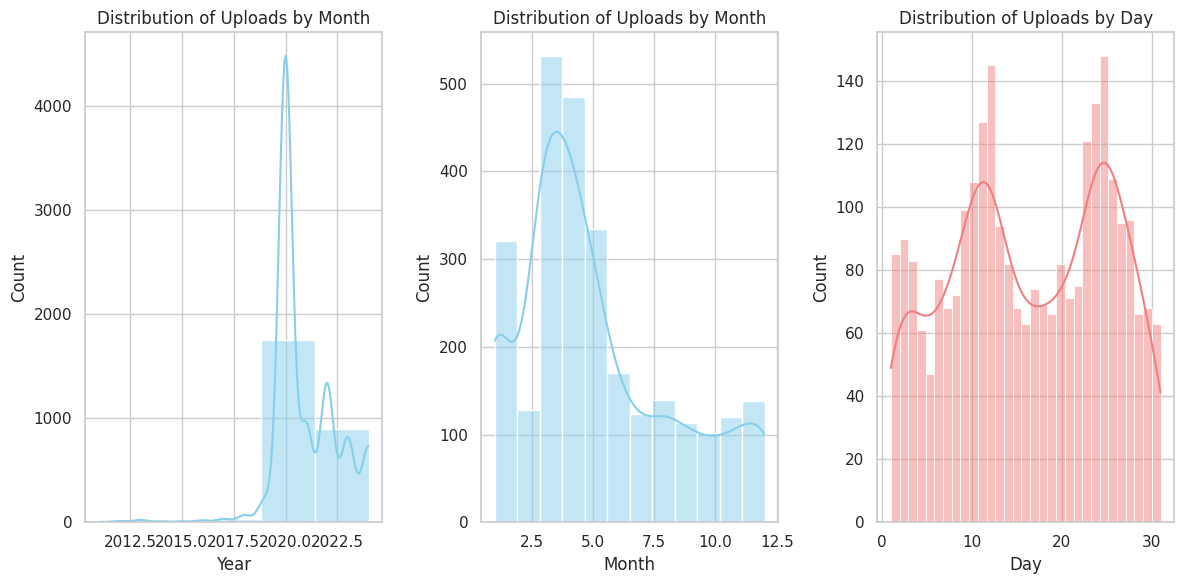

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Your data
data = news_all
# Convert 'Upload Date' to datetime format
data['Upload Date'] = pd.to_datetime(data['Upload Date'])

# Create a new column for month and day
data['Year'] = data['Upload Date'].dt.year
data['Month'] = data['Upload Date'].dt.month
data['Day'] = data['Upload Date'].dt.day

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

#연도별

plt.subplot(1, 3, 1)
sns.histplot(data['Year'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of Uploads by Month')

# 월별
plt.subplot(1, 3, 2)
sns.histplot(data['Month'], kde=True, bins=12, color='skyblue')
plt.title('Distribution of Uploads by Month')

# 일별
plt.subplot(1, 3, 3)
sns.histplot(data['Day'], kde=True, bins=31, color='lightcoral')
plt.title('Distribution of Uploads by Day')

plt.tight_layout()
plt.show()


<ipython-input-11-2e8690a6bfec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Upload Date'] = pd.to_datetime(data['Upload Date'])
<ipython-input-11-2e8690a6bfec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Upload Date'].dt.year
<ipython-input-11-2e8690a6bfec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

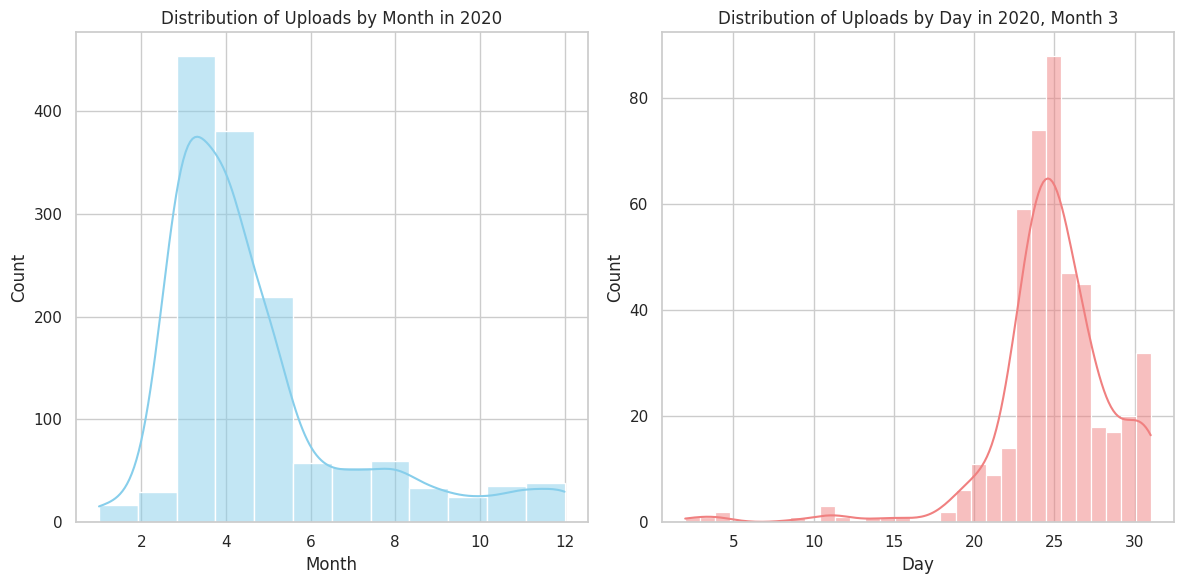

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Your data
data = news_all

# Convert 'Upload Date' to datetime format
data['Upload Date'] = pd.to_datetime(data['Upload Date'])

# Extract year, month, and day
data['Year'] = data['Upload Date'].dt.year
data['Month'] = data['Upload Date'].dt.month
data['Day'] = data['Upload Date'].dt.day

# Find the year with the highest concentration of uploads
most_common_year = data['Year'].mode().iloc[0]

# Filter data for the most common year
most_common_year_data = data[data['Year'] == most_common_year]

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Distribution of uploads by month for the most common year
plt.subplot(1, 2, 1)
sns.histplot(most_common_year_data['Month'], kde=True, bins=12, color='skyblue')
plt.title(f'Distribution of Uploads by Month in {most_common_year}')

# Distribution of uploads by day for the most common year and month
most_common_month = most_common_year_data['Month'].mode().iloc[0]
most_common_month_data = most_common_year_data[most_common_year_data['Month'] == most_common_month]

plt.subplot(1, 2, 2)
sns.histplot(most_common_month_data['Day'], kde=True, bins=31, color='lightcoral')
plt.title(f'Distribution of Uploads by Day in {most_common_year}, Month {most_common_month}')

plt.tight_layout()
plt.show()


In [12]:
print('most_common_year : ', most_common_year)
print('most_common_month : ', most_common_month)

most_common_year :  2020
most_common_month :  3


## most_common_year 행만 추출

In [13]:
# Convert 'Upload Date' to datetime format
data['Upload Date'] = pd.to_datetime(data['Upload Date'])

# Extract year, month, and day
data['Year'] = data['Upload Date'].dt.year

# Find the year with the highest concentration of uploads
most_common_year = data['Year'].mode().iloc[0]

# Extract rows corresponding to the most common year
most_common_year_data = data[(data['Year'] == most_common_year) & ((data['Month'] == 3)|(data['Month'] == 4)|(data['Month'] == 5))]

print(most_common_year_data)

     Upload Date                      Youtuber  \
3561  2020-05-28                         실화 On   
2638  2020-03-29                            老王   
535   2020-05-07                         실화 On   
2775  2020-05-01                      그것이 알고싶다   
3453  2020-05-05                          엠빅뉴스   
...          ...                           ...   
847   2020-03-28     Seductive Merengue Letras   
3720  2020-04-01  Subterraneo Corrida Melodies   
2458  2020-05-13                Hoffman Medina   
429   2020-05-07                     위드제이학원 인강   
3682  2020-04-02                      세계일보 사진부   

                                                     제목    Views  Year  Month  \
3561  [실화단독] 구독자 19만 명, 약사 유튜버의 두 얼굴 - 실화탐사대 (5월27일 방송)  5043589  2020      5   
2638          【老王說】N號房記者完整實錄，超過1000位女性受害！這些女孩原來是這樣被操控的？  4279227  2020      3   
535                  [충.격.분.노] 인천 여중생 집단 성폭행 사건 - 실화탐사대  3788926  2020      5   
2775         범인은 CCTV 영상 안에 있다? 김해 국숫집 사장 실종사건 | 그알 캐비닛  3494755  2020     

<ipython-input-13-455d8c32627a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Upload Date'] = pd.to_datetime(data['Upload Date'])
<ipython-input-13-455d8c32627a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Upload Date'].dt.year


In [14]:
print(most_common_year_data)

     Upload Date                      Youtuber  \
3561  2020-05-28                         실화 On   
2638  2020-03-29                            老王   
535   2020-05-07                         실화 On   
2775  2020-05-01                      그것이 알고싶다   
3453  2020-05-05                          엠빅뉴스   
...          ...                           ...   
847   2020-03-28     Seductive Merengue Letras   
3720  2020-04-01  Subterraneo Corrida Melodies   
2458  2020-05-13                Hoffman Medina   
429   2020-05-07                     위드제이학원 인강   
3682  2020-04-02                      세계일보 사진부   

                                                     제목    Views  Year  Month  \
3561  [실화단독] 구독자 19만 명, 약사 유튜버의 두 얼굴 - 실화탐사대 (5월27일 방송)  5043589  2020      5   
2638          【老王說】N號房記者完整實錄，超過1000位女性受害！這些女孩原來是這樣被操控的？  4279227  2020      3   
535                  [충.격.분.노] 인천 여중생 집단 성폭행 사건 - 실화탐사대  3788926  2020      5   
2775         범인은 CCTV 영상 안에 있다? 김해 국숫집 사장 실종사건 | 그알 캐비닛  3494755  2020     

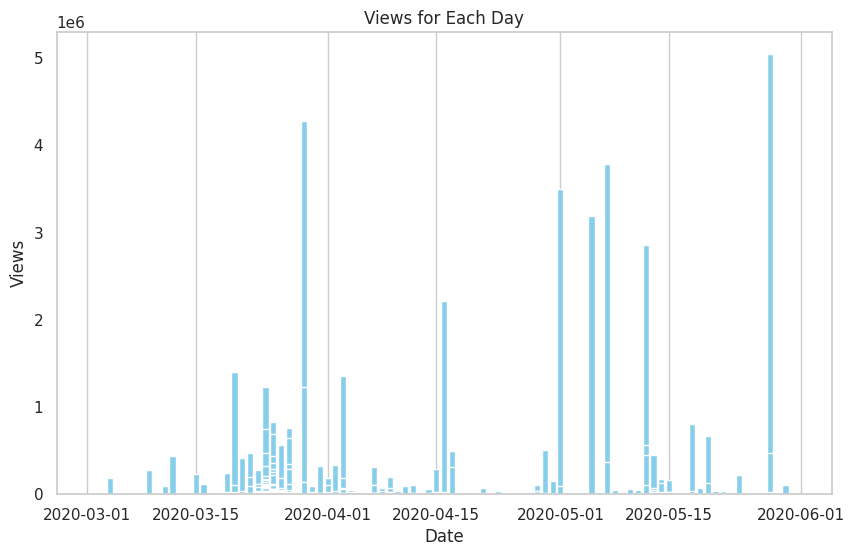

In [17]:
df = most_common_year_data



# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df['Upload Date'], df['Views'], color='skyblue')
plt.title('Views for Each Day')
plt.xlabel('Date')
plt.ylabel('Views')
plt.grid(axis='y')
plt.show()

In [16]:
#분석할 데이터 프레임 명을 news_all로 변경
news_all = most_common_year_data

# 전처리

## 명사추출

In [ ]:
#형태소분석기 호출★
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [ ]:
#특수기호 제거
pattern1 = '[-=+,#/\?:;^$.A*"~%!\\\n\r\t<>[]{}()▼▽♣♧§☆♡´∀｀ﾉ♥♡▲△�ㅁ▼▽▶▷◀◁★☆♠♤●○◎⊙◆◇■□＊━▣“”]' #특수기호 목록
news_all['제목']=news_all['제목'].progress_map(lambda x:re.sub(pattern1, ' ', x).strip())  # 특수 기호를 " " 공란으로

100%|██████████| 1054/1054 [00:00<00:00, 167137.86it/s]
<ipython-input-259-caa9287a7c7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['제목']=news_all['제목'].progress_map(lambda x:re.sub(pattern1, ' ', x).strip())  # 특수 기호를 " " 공란으로


In [ ]:
kiwi.analyze('금잔디에 가면 볶음우동을 먹을 수 있어요')

[([Token(form='금잔디', tag='NNP', start=0, len=3),
   Token(form='에', tag='JKB', start=3, len=1),
   Token(form='가', tag='VV', start=5, len=1),
   Token(form='면', tag='EC', start=6, len=1),
   Token(form='볶음', tag='NNG', start=8, len=2),
   Token(form='우동', tag='NNG', start=10, len=2),
   Token(form='을', tag='JKO', start=12, len=1),
   Token(form='먹', tag='VV', start=14, len=1),
   Token(form='을', tag='ETM', start=15, len=1),
   Token(form='수', tag='NNB', start=17, len=1),
   Token(form='있', tag='VA', start=19, len=1),
   Token(form='어요', tag='EF', start=20, len=2)],
  -68.07340240478516)]

In [ ]:
 #명사 추출 함수 (kiwi 0.10.0)
 def get_noun(texts):
    res = kiwi.analyze(texts)[0][0]
    return [Token[0]
            for Token in res
            if Token[1]=='NNG' or Token[1]=='NNP']

#함수 동작 체크
get_noun('금잔디에 가면 볶음우동을 먹을 수 있어요')

['금잔디', '볶음', '우동']

**부가설명**

Kiwi는 List[Tuple[List[Tuple[형태소, 품사태그, 시작위치, 문자열길이]], 분석 점수]] 형태로 분석 결과를 출력합니다.

맨 바깥 리스트에서 res라는 변수를 생성하고(Line 2), 이를 활용하여 품사 태그가 NNG(명사) 혹은 NNP(고유명사)인 형태소만을 리스트 형태로 반환합니다(Line 3~5).

참고로 Kiwi의 품사 태그는 Sejong의 것과 동일합니다.

In [ ]:
# 최초 형태소 분석★
# 전처리 후 다시 형태소분석을 진행할 때도 이 셀을 실행해주세요.
news_all['nouns'] = news_all['제목'].progress_map(lambda x:get_noun(x))

100%|██████████| 1054/1054 [00:02<00:00, 417.18it/s]
<ipython-input-262-d06654356769>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['nouns'] = news_all['제목'].progress_map(lambda x:get_noun(x))


In [ ]:
#결과 확인
news_all.head()

,Upload Date,Youtuber,제목,Views,Year,Month,Day,nouns
3561,2020-05-28,실화 On,"[실화단독] 구독자 19만 명, 약사 유튜버의 두 얼굴 - 실화탐사대 (5월27일 방송)",5043589,2020,5,28,"[실화, 단독, 구독자, 약사, 유튜버, 얼굴, 실화, 탐사, 대, 방송]"
2638,2020-03-29,老王,【老王說】N號房記者完整實錄，超過1000位女性受害！這些女孩原來是這樣被操控的？,4279227,2020,3,29,[]
535,2020-05-07,실화 On,[충.격.분.노] 인천 여중생 집단 성폭행 사건 - 실화탐사대,3788926,2020,5,7,"[충, 격, 분, 노, 인천, 여중, 집단, 성폭행, 사건, 실화, 탐사]"
2775,2020-05-01,그것이 알고싶다,범인은 CCTV 영상 안에 있다? 김해 국숫집 사장 실종사건 | 그알 캐비닛,3494755,2020,5,1,"[범인, 영상, 안, 김해, 국숫집, 사장, 실종, 사건, 알, 캐비닛]"
3453,2020-05-05,엠빅뉴스,"그때 우린 잠시 미쳤었죠.. 그 시절 문방구 플렉스, 어디까지 해 봤니?",3193469,2020,5,5,"[그때, 시절, 문방구, 플렉스]"


In [ ]:
news_all['nouns']

3561    [실화, 단독, 구독자, 약사, 유튜버, 얼굴, 실화, 탐사, 대, 방송]
2638                                           []
535     [충, 격, 분, 노, 인천, 여중, 집단, 성폭행, 사건, 실화, 탐사]
2775     [범인, 영상, 안, 김해, 국숫집, 사장, 실종, 사건, 알, 캐비닛]
3453                           [그때, 시절, 문방구, 플렉스]
                          ...                    
847                [박사, 초보, 암호화폐, 악용, 범죄, 진화, 대비]
3720        [사설, 방, 성범죄, 강력, 처벌, 입법, 국회, 마지막, 의무]
2458                         [방, 개설, 갓갓, 대학생, 문형]
429                                   [고1, 능률, 과]
3682                                  [방, 강력, 처벌]
Name: nouns, Length: 1054, dtype: object



> 전처리 반복


다음 과정을 아주 많이 반복합니다:

1. 일부 아이템을 랜덤하게 추출하여 확인
1.   정규화
2.   커스텀 사전 추가
3.   불용어 제거
4.   다시 형태소분석
















**기사 랜덤 추출**

## 커스텀사전

In [ ]:
#카운터 리셋
counter=0

In [ ]:
i = random.randint(0, len(news_all))

print("article {}".format(i)) #인덱스 번호
print(news_all.iloc[i][['제목','nouns']].values[0]) #기사 본문
print(news_all.iloc[i][['제목','nouns']].values[1]) #생성된 토큰
counter+=1
print('counter:{}'.format(counter))

article 120
조주빈 신상공개, 텔레그램 N번방 박사의 '한 마디'
['조주빈', '신상', '공개', '텔레그램', '방', '박사', '마디']
counter:1


In [ ]:
#커스텀 사전★
word_list=['CNN','연쇄살인마','시사상식','마지막화','문제점','질문','조수빈','02년생','알쓸범잡','박사방','벗방BJ','흑설공주','김원사건파일','랜덤채팅','처벌법','불법합성','민식이법','바지사장','다크웹','10대','여고생','SBS','디지털성범죄물','공소시효',\
           '재개정','미성년','국제단체','박지현','지인능욕','개미귀신','부산여성단체','국회청원','이기야','성착취범','구속영장','운영진','10대','기본권','10대','완장방','무방비','운영자','인권센터','직촬방','내부고발','국제공조수사','BBC','SNS','양형위원장','도용','국내기업','이루다','전원조사','관전자','경남상시혐','속도','국수본부장','의제강간연령','구속영장','신지예','민생당','사이버팀','강제추행','실효성','신상공개','승적','특별조사팀','AI','아동청소년','영화화','성노예화','아동청소년성보호','정승민','자처','재난지원금','범죄단체조직죄','주민번호','구속영장',\
    "산·학",'김유빈','창X들','성착취','IP','박사방','능욕방','제2의','대학생','시민방범대','소통령','협박죄','예비후보','엄중처벌','교사단체','공인요원','신상공개','주거침입강제추행죄','여성의당','통합당',
           '불법촬영물','박사방','신상공개','그루밍','성범죄물','물차별','미성년자','착취범','처벌강화법','무법천지','종족주의','2차','양성희','위장수사','제2','재발','비윤리성','문형욱','무기징역','내주',\
           'n번방','N번방','국민여론','무기징역형','유료회원','아·청','그알','최진성','무죄','국민참여재판','재판','범죄추적극','엘','N번방','국민청원','오덕식',\
           '성착취물','단순소지','디지털성범죄물','방지방법원','국무회의','촬영물','SNS','성평등선대본','임시국회','박사방','조직죄','범죄단체','조주빈','개설자','경찰조사','갓갓',\
           '심바','강력처벌','JMS','처벌촉구','신상공개','디지털성범죄','법정최고형','반일','이우연','양형기준','솜방망이처벌','나체사진','불법촬영물','기자회견','여성후보','상무위원회','동물판']

In [ ]:
# Remove duplicates while preserving the order
unique_word_list = list(dict.fromkeys(word_list))

# Print the result
print(unique_word_list)

['CNN', '연쇄살인마', '시사상식', '마지막화', '문제점', '질문', '조수빈', '02년생', '알쓸범잡', '박사방', '벗방BJ', '흑설공주', '김원사건파일', '랜덤채팅', '처벌법', '불법합성', '민식이법', '바지사장', '다크웹', '10대', '여고생', 'SBS', '디지털성범죄물', '공소시효', '재개정', '미성년', '국제단체', '박지현', '지인능욕', '개미귀신', '부산여성단체', '국회청원', '이기야', '성착취범', '구속영장', '운영진', '기본권', '완장방', '무방비', '운영자', '인권센터', '직촬방', '내부고발', '국제공조수사', 'BBC', 'SNS', '양형위원장', '도용', '국내기업', '이루다', '전원조사', '관전자', '경남상시혐', '속도', '국수본부장', '의제강간연령', '신지예', '민생당', '사이버팀', '강제추행', '실효성', '신상공개', '승적', '특별조사팀', 'AI', '아동청소년', '영화화', '성노예화', '아동청소년성보호', '정승민', '자처', '재난지원금', '범죄단체조직죄', '주민번호', '산·학', '김유빈', '창X들', '성착취', 'IP', '능욕방', '제2의', '대학생', '시민방범대', '소통령', '협박죄', '예비후보', '엄중처벌', '교사단체', '공인요원', '주거침입강제추행죄', '여성의당', '통합당', '불법촬영물', '그루밍', '성범죄물', '물차별', '미성년자', '착취범', '처벌강화법', '무법천지', '종족주의', '2차', '양성희', '위장수사', '제2', '재발', '비윤리성', '문형욱', '무기징역', '내주', 'n번방', 'N번방', '국민여론', '무기징역형', '유료회원', '아·청', '그알', '최진성', '무죄', '국민참여재판', '재판', '범죄추적극', '엘', '국민청원', '오덕식', '성착취물', '단순소지', '방지방법원', '국무회의', '촬영물', '

In [ ]:
#커스텀 사전 리스트를 dataframe형태로 변환
custom_dict = pd.DataFrame({"word":unique_word_list})

#품사태그는 고유명사로 지정
custom_dict['morp']="NNP"

#Kiwi는 우선순위를 부여하기 위해 score개념이 존재합니다. 커스텀 단어를 우선 활용하기 위해 score값에 1을 부여.
custom_dict['score']=1

#데이터 확인
custom_dict.head()

,word,morp,score
0,CNN,NNP,1
1,연쇄살인마,NNP,1
2,시사상식,NNP,1
3,마지막화,NNP,1
4,문제점,NNP,1


In [ ]:
#커스텀 사전을 csv로 저장하고 불러옴★
custom_dict.to_csv("/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/custom_dict.txt", index=False, header=False, sep="\t",encoding='UTF-8')

In [ ]:
#kiwi의 load_user_dictionary는 커스텀 사전을 변경할 경우 업데이트된 단어의 수를 반환해 줍니다.
kiwi.load_user_dictionary('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/custom_dict.txt')

142

In [ ]:
# 최초 형태소 분석★
# 전처리 후 다시 형태소분석을 진행할 때도 이 셀을 실행해주세요.
news_all['nouns'] = news_all['제목'].progress_map(lambda x:get_noun(x))

100%|██████████| 1054/1054 [00:03<00:00, 302.84it/s]
<ipython-input-272-d06654356769>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['nouns'] = news_all['제목'].progress_map(lambda x:get_noun(x))


## **단어정규화 딕셔너리**

In [ ]:
#카운터 리셋
counter=0

In [ ]:
i = random.randint(0, len(news_all))

print("article {}".format(i)) #인덱스 번호
print(news_all.iloc[i][['제목','nouns']].values[0]) #기사 본문
print(news_all.iloc[i][['제목','nouns']].values[1]) #생성된 토큰
counter+=1
print('counter:{}'.format(counter))

article 151
협박부터 성폭행까지...N번방 가해자들 처벌 어떻게 되나? / 14F
['협박', '성폭행', 'N번방', '가해자', '처벌']
counter:1


* 정규화: 동일한 표현을 다르게 쓴 것을 모두 통일해주는 것
영어 약자, 유행병 이름, 사람 이름, 한자 및 영어 표현 등 수작업으로 교체하여 분류 정확도 높이기

In [ ]:
#정규화 딕셔너리 ★
dic_standardization={'法':'법원','비디오머그':'방송','X착취':'성착취','마지막화':'방송','영화':'방송','다큐':'방송','넷플릭스':'방송','알쓸범잡':'방송','미성년':'미성년자','김원사건파일':'방송','스타':'연예인','엑소':"연예인",'찬열':'연예인','백현':'연예인','유사':'제2','재발':'제2','국민':'국민청원',\
                     '문':'문재인','남성':'남자','檢·警':'검·경','성착취범':'성착취','제2의':'제2','붓다':'부따','그알':"방송",\
                     '박사':'박사방','男':'남자','신상':'신상공개','공개':'신상공개','性':'성','代':'대','부대':'군대','육군':'군대','일병':'군대',\
                     '디지털성범죄':'디지털성범죄물','디지털':'디지털성범죄물','성착취물':'성착취','착취물':'성착취','中':'중국','靑':'청와대','文':'문재인','★':'연예인','무기징역형':'무기징역','女':'여자',\
                     '그알':'그것이알고싶다','n번방':'N번방','軍':'군','檢':'검사','韓':'한국','與':'여당','野':'야당','北':'북한','(脫)':'','(非)':'','(正常)':''}

In [ ]:
#정규화 딕셔너리를 활용하여 단어 교체★
for old, new in dic_standardization.items():
  print("convert {} into {}.".format (old, new))
  news_all['제목'] = news_all['제목'].progress_map(lambda x:x.replace(old, new))

convert 法 into 법원.


100%|██████████| 1054/1054 [00:00<00:00, 296101.57it/s]
<ipython-input-276-3c8aafef5074>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['제목'] = news_all['제목'].progress_map(lambda x:x.replace(old, new))


convert 비디오머그 into 방송.


100%|██████████| 1054/1054 [00:00<00:00, 160046.21it/s]


convert X착취 into 성착취.


100%|██████████| 1054/1054 [00:00<00:00, 183298.63it/s]


convert 마지막화 into 방송.


100%|██████████| 1054/1054 [00:00<00:00, 251281.56it/s]


convert 영화 into 방송.


100%|██████████| 1054/1054 [00:00<00:00, 207237.78it/s]


convert 다큐 into 방송.


100%|██████████| 1054/1054 [00:00<00:00, 394115.75it/s]


convert 넷플릭스 into 방송.


100%|██████████| 1054/1054 [00:00<00:00, 218613.21it/s]


convert 알쓸범잡 into 방송.


100%|██████████| 1054/1054 [00:00<00:00, 286655.19it/s]


convert 미성년 into 미성년자.


100%|██████████| 1054/1054 [00:00<00:00, 221927.53it/s]


convert 김원사건파일 into 방송.


100%|██████████| 1054/1054 [00:00<00:00, 402769.35it/s]


convert 스타 into 연예인.


100%|██████████| 1054/1054 [00:00<00:00, 372622.76it/s]


convert 엑소 into 연예인.


100%|██████████| 1054/1054 [00:00<00:00, 409826.31it/s]


convert 찬열 into 연예인.


100%|██████████| 1054/1054 [00:00<00:00, 162094.25it/s]


convert 백현 into 연예인.


100%|██████████| 1054/1054 [00:00<00:00, 416074.96it/s]


convert 유사 into 제2.


100%|██████████| 1054/1054 [00:00<00:00, 356861.19it/s]


convert 재발 into 제2.


100%|██████████| 1054/1054 [00:00<00:00, 410511.32it/s]


convert 국민 into 국민청원.


100%|██████████| 1054/1054 [00:00<00:00, 410016.36it/s]


convert 문 into 문재인.


100%|██████████| 1054/1054 [00:00<00:00, 396555.11it/s]


convert 남성 into 남자.


100%|██████████| 1054/1054 [00:00<00:00, 361796.91it/s]


convert 檢·警 into 검·경.


100%|██████████| 1054/1054 [00:00<00:00, 398593.13it/s]


convert 성착취범 into 성착취.


100%|██████████| 1054/1054 [00:00<00:00, 356458.35it/s]


convert 제2의 into 제2.


100%|██████████| 1054/1054 [00:00<00:00, 383084.61it/s]


convert 붓다 into 부따.


100%|██████████| 1054/1054 [00:00<00:00, 378525.25it/s]


convert 그알 into 그것이알고싶다.


100%|██████████| 1054/1054 [00:00<00:00, 315883.99it/s]


convert 박사 into 박사방.


100%|██████████| 1054/1054 [00:00<00:00, 381860.28it/s]


convert 男 into 남자.


100%|██████████| 1054/1054 [00:00<00:00, 404797.77it/s]


convert 신상 into 신상공개.


100%|██████████| 1054/1054 [00:00<00:00, 397160.76it/s]


convert 공개 into 신상공개.


100%|██████████| 1054/1054 [00:00<00:00, 394186.04it/s]


convert 性 into 성.


100%|██████████| 1054/1054 [00:00<00:00, 412503.16it/s]


convert 代 into 대.


100%|██████████| 1054/1054 [00:00<00:00, 388402.43it/s]


convert 부대 into 군대.


100%|██████████| 1054/1054 [00:00<00:00, 230285.80it/s]


convert 육군 into 군대.


100%|██████████| 1054/1054 [00:00<00:00, 413932.25it/s]


convert 일병 into 군대.


100%|██████████| 1054/1054 [00:00<00:00, 412041.79it/s]


convert 디지털성범죄 into 디지털성범죄물.


100%|██████████| 1054/1054 [00:00<00:00, 340637.73it/s]


convert 디지털 into 디지털성범죄물.


100%|██████████| 1054/1054 [00:00<00:00, 269183.24it/s]


convert 성착취물 into 성착취.


100%|██████████| 1054/1054 [00:00<00:00, 340874.12it/s]


convert 착취물 into 성착취.


100%|██████████| 1054/1054 [00:00<00:00, 352282.76it/s]


convert 中 into 중국.


100%|██████████| 1054/1054 [00:00<00:00, 381563.65it/s]


convert 靑 into 청와대.


100%|██████████| 1054/1054 [00:00<00:00, 354913.01it/s]


convert 文 into 문재인.


100%|██████████| 1054/1054 [00:00<00:00, 356688.43it/s]


convert ★ into 연예인.


100%|██████████| 1054/1054 [00:00<00:00, 390529.72it/s]


convert 무기징역형 into 무기징역.


100%|██████████| 1054/1054 [00:00<00:00, 400253.18it/s]


convert 女 into 여자.


100%|██████████| 1054/1054 [00:00<00:00, 401854.05it/s]


convert n번방 into N번방.


100%|██████████| 1054/1054 [00:00<00:00, 371152.42it/s]


convert 軍 into 군.


100%|██████████| 1054/1054 [00:00<00:00, 432817.35it/s]


convert 檢 into 검사.


100%|██████████| 1054/1054 [00:00<00:00, 379174.58it/s]


convert 韓 into 한국.


100%|██████████| 1054/1054 [00:00<00:00, 437789.31it/s]


convert 與 into 여당.


100%|██████████| 1054/1054 [00:00<00:00, 410854.69it/s]


convert 野 into 야당.


100%|██████████| 1054/1054 [00:00<00:00, 435890.00it/s]


convert 北 into 북한.


100%|██████████| 1054/1054 [00:00<00:00, 433453.91it/s]


convert (脫) into .


100%|██████████| 1054/1054 [00:00<00:00, 427253.93it/s]


convert (非) into .


100%|██████████| 1054/1054 [00:00<00:00, 427295.23it/s]


convert (正常) into .


100%|██████████| 1054/1054 [00:00<00:00, 428870.43it/s]


## **불용어 제거**


---


불용어는 분석에 사용되지 않을 단어를 의미합니다. 다음 유형의 단어를 제거하였습니다:

1. 자연어처리 시 통용되는 불용어 리스트
2. 너무 많이 등장하는 단어들 - 모든 문서에서 공통적으로 등장하여 분류 성능을 낮출 우려가 있음.
한 단어로 된 단어
3. 토픽 특성상 핵심 주제어인 '원전' '원자력발전'도 제거하는 게 좋음

In [ ]:
#1차 필터링: 한국어 불용어 사전 활용★
stop_list1 = open('/content/drive/MyDrive/2023 겨울계절 URP/코드/재희/토픽모델링/stopword.txt', encoding = 'utf-8')


lines1 = stop_list1.readlines() #한 줄마다 읽어옴


stopwords = [] #불용어 리스트
for line in lines1:
    a= line.split() #줄 단위 분할
    stopwords.append(a) #한 줄마다 불용어 리스트에 추가


In [ ]:
i = random.randint(0, len(news_all))

print("article {}".format(i)) #인덱스 번호
print(news_all.iloc[i][['제목','nouns']].values[0]) #기사 본문
print(news_all.iloc[i][['제목','nouns']].values[1]) #생성된 토큰
counter+=1
print('counter:{}'.format(counter))

article 513
버벌진트, N번방 회원 사망에 "기쁘다" 표현 논란 정리
['버벌진트', 'n번방', '회원', '사망', '표현', '논란', '정리']
counter:2


In [ ]:
#2차 필터링: 커스텀 불용어 리스트★
custom_stopwords = ['뉴스큐','현장','공유','중심','시선','무플방지','취재','사건','강력','사설','브리핑','오디오래빗','양성희','취중','이동','정면','승부','논설위원','확대경','한마당','마당','통과','밑줄','처리','가능','심층','현장','연결','인터뷰','속보','이데일리','대상','발언','관련','영상','황출새','타임라인','착취','뉴스','핫클릭','보도자료','뉴스하이킥','종합','사사건건','영상','지금','단독','이번','뉴구세요','포토','오늘','물','뉴스큐','이슈와치','단독','초점','이슈','관련','한국','이날','발생','이후','이번','오후','오전','가운데','기자','사진','최근','정부','나이트포커스','정승민']
stopwords+=custom_stopwords #커스텀 불용어를 리스트에 추가

In [ ]:
#'불용어 리스트에 없는'형태소만 남기는 방식으로 불용어 제거★
news_all['nouns'] = news_all['nouns'].progress_map(lambda x:[w for w in x if w not in stopwords])

100%|██████████| 1054/1054 [00:00<00:00, 3050.44it/s]
<ipython-input-280-0724f6fa9bb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['nouns'] = news_all['nouns'].progress_map(lambda x:[w for w in x if w not in stopwords])


In [ ]:
#3차 필터링: 한 글자 제거★
news_all['nouns'] = news_all['nouns'].progress_map(lambda x:[w for w in x if len(w) > 1])

100%|██████████| 1054/1054 [00:00<00:00, 121781.67it/s]
<ipython-input-281-128724ea1ca8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['nouns'] = news_all['nouns'].progress_map(lambda x:[w for w in x if len(w) > 1])


In [ ]:
#print(news_all.iloc[3502][['제목','nouns']].values[1]) #기사 본문

In [ ]:
news_all.head()

,Upload Date,Youtuber,제목,Views,Year,Month,Day,nouns
3561,2020-05-28,실화 On,"[실화단독] 구독자 19만 명, 약사 유튜버의 두 얼굴 - 실화탐사대 (5월27일 방송)",5043589,2020,5,28,"[실화, 구독자, 약사, 유튜버, 얼굴, 실화, 탐사, 방송]"
2638,2020-03-29,老王,【老王說】N號房記者完整實錄，超過1000位女성受害！這些女孩原來是這樣被操控的？,4279227,2020,3,29,[]
535,2020-05-07,실화 On,[충.격.분.노] 인천 여중생 집단 성폭행 사건 - 실화탐사대,3788926,2020,5,7,"[인천, 여중, 집단, 성폭행, 실화, 탐사]"
2775,2020-05-01,그것이 알고싶다,범인은 CCTV 영상 안에 있다? 김해 국숫집 사장 실종사건 | 그것이알고싶다 캐비닛,3494755,2020,5,1,"[범인, 김해, 국숫집, 사장, 실종, 그알, 캐비닛]"
3453,2020-05-05,엠빅뉴스,"그때 우린 잠시 미쳤었죠.. 그 시절 문재인방구 플렉스, 어디까지 해 봤니?",3193469,2020,5,5,"[그때, 시절, 문방구, 플렉스]"


In [ ]:
#단어 빈도 파악
nouncounter=news_all['nouns'].sum() #형태소 목록 병합
counts = collections.Counter(nouncounter) #병합된 목록 카운트
print(counts) #결과

Counter({'n번방': 448, 'N번방': 346, '텔레그램': 230, '조주빈': 198, '처벌': 161, '박사방': 144, '갓갓': 91, '공개': 72, '신상공개': 57, '박사': 56, '방지법': 55, '성범죄': 51, '피해자': 50, '정리': 45, '얼굴': 43, '성착취': 39, '운영자': 38, '공범': 38, '디지털': 38, '범죄': 36, '변호사': 35, '이유': 32, '가해자': 31, '검거': 29, '국회': 29, '강훈': 27, '악마': 26, '부따': 26, '방송': 25, '문형욱': 25, '분노': 25, '여성': 25, '경찰': 24, '사람': 22, '촉구': 22, '회원': 21, '국민': 21, '총선': 21, '수사': 20, '신상': 20, '검찰': 20, '사주': 20, '코로나': 19, '성폭력': 18, '정의당': 18, '논란': 17, '대한민국': 17, '개설자': 17, '법률방송': 17, '범죄자': 16, '미성년자': 16, '관상': 16, '성착취물': 16, '분석': 15, '미래': 15, '통합당': 15, '피의자': 15, '손석희': 14, '긴급': 14, '교육': 14, '구속': 14, '그알': 13, '세계': 13, '실체': 13, '디지털성범죄': 13, '방지': 13, '심상정': 13, '시청': 12, '황교안': 12, '넷플릭스': 12, '정보': 12, '비디오머그': 11, '가입자': 11, '국민청원': 11, '소름': 11, '청원': 11, '상황': 11, '강화': 11, '소지': 11, '유포': 11, '전원': 11, '이브닝': 11, '실화': 10, '최초': 10, '충격': 10, '세상': 10, '운영': 10, '예방': 10, '요약': 10, '징역': 10, '이기야': 10, '이야기': 10, '대책': 10, '개인':

In [ ]:
news_all['nouns']

3561    [실화, 구독자, 약사, 유튜버, 얼굴, 실화, 탐사, 방송]
2638                                    []
535              [인천, 여중, 집단, 성폭행, 실화, 탐사]
2775        [범인, 김해, 국숫집, 사장, 실종, 그알, 캐비닛]
3453                    [그때, 시절, 문방구, 플렉스]
                       ...                
847         [박사, 초보, 암호화폐, 악용, 범죄, 진화, 대비]
3720       [n번방, 성범죄, 처벌, 입법, 국회, 마지막, 의무]
2458               [n번방, 개설, 갓갓, 대학생, 문형욱]
429                               [고1, 능률]
3682                             [n번방, 처벌]
Name: nouns, Length: 1054, dtype: object

In [ ]:
processed_data=[]
df=news_all

# Iterate through the DataFrame
for index, row in df.iterrows():
    nouns_list = row['nouns']
    processed_data.append(nouns_list)


In [ ]:
processed_data

[['실화', '구독자', '약사', '유튜버', '얼굴', '실화', '탐사', '방송'],
 [],
 ['인천', '여중', '집단', '성폭행', '실화', '탐사'],
 ['범인', '김해', '국숫집', '사장', '실종', '그알', '캐비닛'],
 ['그때', '시절', '문방구', '플렉스'],
 ['뜬공', '홈런', '경기', '홈런', '폭발', '공인구'],
 ['맨홀', '얼굴', '시신', '정체', '해양대', '맨홀', '변사', '그알', '캐비닛'],
 ['방송', '재판', '결과', '제주', '초등', '교사', '사망', '그알', '캐비닛'],
 ['대한민국살인사건', '회', '운하', '일가족', '살인', '그날', '통나무', '산장'],
 ['사실', 'N번방', '가해자'],
 ['조주빈', '지인', '증언', '군대', '후임', '중독자', '대학'],
 ['싸이', '신천지', '논란', 'n번방', '출처'],
 ['N번방', '운영자', '갓갓', '문형욱', '얼굴', '공개', '질문', '경찰'],
 ['텔레그램', 'N번방', 'N번방', '회원', '통화', 'N번방', '정리', '✅ㅣ채크', '크랩'],
 ['박사', '조주빈', '"저', '악마', '비디오머그'],
 ['범죄자', '가면', '모습', '박사방', 'N번방', '조주빈', '대학', '동기'],
 ['텔레그램', 'N번방', '도용'],
 ['대한민국살인사건', '화', '임신부', '전현', '납치', '살해', '유괴'],
 ['이태원', '클럽', '방문자', '연락', '두절', '국민', '분노'],
 ['N번방', '너와'],
 ['전주', '여성', '실종', '살인', '물체', '전체', '정리', '의문점', '김원사건파일'],
 ['조주빈', '공범', '부따', '강훈', '미성년자', '신상공개', '진심', '비디오머그'],
 ['여대생'

# LDA



```
# processed_data=[['스위트', '새벽', '시간'],
 ['스위트', '송강'],
 ['스위트', '스위트', '나용'],
 ['스위트'],
 ['스위트'],
 ['앞자리', ...
```



##필요한 모듈 import



In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)




##모델링


* 📌 num_topics: 생성될 토픽의 개수
* 📌 chunksize: 한번의 트레이닝에 처리될 문서의 개수
* 📌 passes: 전체 코퍼스 트레이닝 횟수
* 📌 interations: 문서 당 반복 횟수

`class gensim.models.ldamodel.LdaModel(corpus=None, num_topics=100, id2word=None, distributed=False, chunksize=2000, passes=1, update_every=1, alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=50, gamma_threshold=0.001, minimum_probability=0.01, random_state=None, ns_conf=None, minimum_phi_value=0.01, per_word_topics=False, callbacks=None, dtype=<class 'numpy.float32'>)`

물론 이 파라미터를 다른 숫자로 여러번 해서 가장 정확도 높은 모델을 선택하는 것이 가장 좋습니다. 모델의 정확도는 토픽의 일관성으로도 볼 수 있을텐데, 토픽의 일관성은 Coherence를 보면 됩니다. 파라미터 eval_every=1로 설정하여, 매 pass마다 문서의 Convergence 평가하고, 대부분의 문서가 포함되는 pass를 선정할 수도 있습니다.

Number of unique tokens: 102
Number of documents: 1054


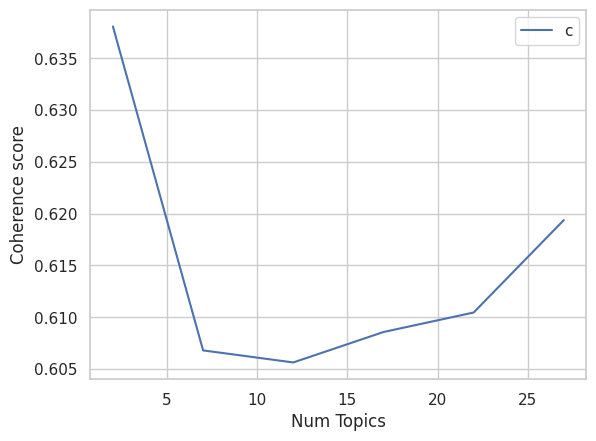

In [ ]:
# -*- coding: utf-8 -*-
from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 30;
    start = 2;
    step = 5;

    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

if __name__ == '__main__':
    #processed_data = [sent.strip().split(",") for sent in tqdm(open('./data/tokenized_data.csv', 'r', encoding='utf-8').readlines())]

    # 정수 인코딩과 빈도수 생성
    dictionary = corpora.Dictionary(processed_data)

    # 출현빈도가 적거나 자주 등장하는 단어는 제거
    # no_below: 적어도 n개 이상의 문서에서 등장해야함
    # no_above: n% 이상의 문서에서 등장하면 배제함.

    dictionary.filter_extremes(no_below=8, no_above=0.025)
    corpus = [dictionary.doc2bow(text) for text in processed_data]
    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))

    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    # 최적의 토픽 수 찾기
    find_optimal_number_of_topics(dictionary, corpus, processed_data)


In [ ]:
from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


if __name__ == '__main__':
    #processed_data = [sent.strip().split(",") for sent in tqdm(open('./data/tokenized_data.csv', 'r', encoding='utf-8').readlines())]

    # 정수 인코딩과 빈도수 생성
    dictionary = corpora.Dictionary(processed_data)

    # 출현빈도가 적거나 자주 등장하는 단어는 제거
    dictionary.filter_extremes(no_below=8, no_above=0.025)
    corpus = [dictionary.doc2bow(text) for text in processed_data]
    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))

    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    # 최적의 토픽 수 찾기 => 14개로 나옴
    # find_optimal_number_of_topics(dictionary, corpus, processed_data)
    # exit()

    perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')
    coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell')

    lda_model = LdaModel(corpus, id2word=dictionary, num_topics=5, passes=30, callbacks=[coherence_logger, perplexity_logger])

    topics = lda_model.print_topics(num_topics=5, num_words=5) #단어 개수 선정

    topic_dict = {}
    for topic in topics:
      topic_num, topic_words = topic
      words_proba = [word.split("*") for word in topic_words.split(" + ")]
      # 비율이 가장 높은 단어를 토픽으로 선정
      max_proba_word = max(words_proba, key=lambda x: float(x[0]))[1].replace('"', '')
      topic_dict[topic_num] = max_proba_word

    print(topic_dict)
    # 각 문서에 대한 토픽 할당
   #doc_topic_assignments = []
    #for doc_bow in corpus:
    #    topic_distribution = lda_model.get_document_topics(doc_bow)
    #    assigned_topic = max(topic_distribution, key=lambda x: x[1])[0]  # 가장 확률이 높은 토픽 선택
    #    doc_topic_assignments.append(assigned_topic)

    # 토픽 할당 값을 DataFrame에 추가
    #df['토픽_할당'] = doc_topic_assignments




    # Compute Coherence Score using c_v
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score (c_v): ', coherence_lda)


Number of unique tokens: 102
Number of documents: 1054
{0: '여성', 1: '강훈', 2: '문형욱', 3: '코로나', 4: '경찰'}

Coherence Score (c_v):  0.6254513206906125


In [ ]:
len(topic_dict)

5

In [ ]:
for i, topic_list in enumerate(lda_model[corpus]):
    if i==5: #일단 5개만 확인
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.7998097), (1, 0.05000089), (2, 0.050001044), (3, 0.050000966), (4, 0.050187398)]
1 번째 문서의 topic 비율은 [(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0.2)]
2 번째 문서의 topic 비율은 [(0, 0.59998965), (1, 0.100002505), (2, 0.10000288), (3, 0.100002706), (4, 0.100002274)]
3 번째 문서의 topic 비율은 [(0, 0.5999921), (1, 0.10000194), (2, 0.10000221), (3, 0.100002006), (4, 0.10000175)]
4 번째 문서의 topic 비율은 [(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0.2)]


## LDA모델 결과 df로 저장

In [ ]:
issue = 'N번방'

In [ ]:
# DataFrame 생성
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
df_results = pd.DataFrame(columns=['토픽 번호', '대표 단어', '대표 단어 확률','튜플 리스트'])

# DataFrame에 데이터 추가
for doc_num, topic_list in enumerate(lda_model[corpus]):
    if doc_num==1:
      break
    for topic_id, weight in topic_list:
        rep_word, word_prob = lda_model.show_topic(topic_id)[0]
        df_results = df_results.append({
            '토픽 번호': topic_id,
            '대표 단어': rep_word,
            '대표 단어 확률': word_prob,
            '튜플 리스트': lda_model.show_topic(topic_id)
        }, ignore_index=True)

# 결과 출력
print(df_results)
LDA_Topic_list=df_results


#csv 저장
#LDA_Topic_list.to_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/토픽모델링결과/{}_LDA_Topic_list_{}_df_유튜브.csv'.format(issue,timestamp),encoding='utf-8-sig',index=False)

  토픽 번호 대표 단어  대표 단어 확률                                             튜플 리스트
0     0    여성  0.075975  [(여성, 0.075975075), (국민, 0.0639157), (사주, 0.06...
1     1    강훈  0.094540  [(강훈, 0.09454022), (부따, 0.09105369), (촉구, 0.07...
2     2   문형욱  0.104410  [(문형욱, 0.104410164), (회원, 0.08815253), (교육, 0....
3     3   코로나  0.071517  [(코로나, 0.07151697), (법률방송, 0.06403464), (성착취물,...
4     4    경찰  0.074926  [(경찰, 0.07492615), (악마, 0.07290288), (수사, 0.06...


<ipython-input-325-8d5104173083>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-325-8d5104173083>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-325-8d5104173083>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-325-8d5104173083>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-325-8d5104173083>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_resul

In [ ]:
'''
for i, topic_list in enumerate(lda_model[corpus]):
    if i==1: # 일단 5개만 확인
        break
    print(i, '번째 문서의 topic 비율은', topic_list)

    # 각 주제의 상위 단어와 가중치 출력
    for topic_id, weight in topic_list:
        print(f"Topic {topic_id}:")
        print(lda_model.show_topic(topic_id))  # 해당 주제의 상위 단어 출력
        print("------")
        '''


'\nfor i, topic_list in enumerate(lda_model[corpus]):\n    if i==1: # 일단 5개만 확인\n        break\n    print(i, \'번째 문서의 topic 비율은\', topic_list)\n\n    # 각 주제의 상위 단어와 가중치 출력\n    for topic_id, weight in topic_list:\n        print(f"Topic {topic_id}:")\n        print(lda_model.show_topic(topic_id))  # 해당 주제의 상위 단어 출력\n        print("------")\n        '

In [ ]:
'''
for i, topic_list in enumerate(lda_model[corpus]):
    if i==5: # 일단 5개만 확인
        break
    print(i, '번째 문서의 topic 비율은', topic_list)
'''

"\nfor i, topic_list in enumerate(lda_model[corpus]):\n    if i==5: # 일단 5개만 확인\n        break\n    print(i, '번째 문서의 topic 비율은', topic_list)\n"

# 저장하기 위한 df정리

In [ ]:
def make_topictable_per_doc(lda_model, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(lda_model[corpus]):
        doc = topic_list[0] if lda_model.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%),
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)


In [ ]:
topic_table=make_topictable_per_doc(lda_model, corpus)

<ipython-input-328-a435ce19ffd3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
<ipython-input-328-a435ce19ffd3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
<ipython-input-328-a435ce19ffd3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
<ipython-input-328-a435ce19ffd3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

In [ ]:
def make_topictable_per_doc(lda_model, corpus, topic_dict):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(lda_model[corpus]):
        doc = topic_list[0] if lda_model.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                # 가장 비중이 높은 토픽의 대표 단어를 가져옵니다.
                topic_word = topic_dict.get(topic_num, f"Unknown_{topic_num}")
                new_row = pd.Series([topic_word, round(prop_topic, 4), topic_list])
                topic_table = pd.concat([topic_table, new_row.to_frame().T], ignore_index=True)
            else:
                break
    return topic_table


In [ ]:
topic_table = make_topictable_per_doc(lda_model, corpus, topic_dict)

각 문서에 기여한 토픽이 있고 다시 그 토픽 안에 기여된 단어들이 있으므로 가장 비율이 높은 토픽의 가장 비율이 높은 단어를 할당해야함

In [ ]:
print(topic_table)

        0       1                                                  2
0      여성  0.7998  [(0, 0.7998122), (1, 0.050000887), (2, 0.05000...
1      여성     0.2  [(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0...
2      여성     0.6  [(0, 0.5999896), (1, 0.10000251), (2, 0.100002...
3      여성     0.6  [(0, 0.5999921), (1, 0.10000193), (2, 0.100002...
4      여성     0.2  [(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0...
...   ...     ...                                                ...
1049   여성     0.2  [(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0...
1050  코로나     0.4  [(0, 0.066670164), (1, 0.3992665), (2, 0.06736...
1051  문형욱     0.6  [(0, 0.100000724), (1, 0.10000071), (2, 0.5999...
1052   여성     0.2  [(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0...
1053   여성     0.2  [(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0...

[1054 rows x 3 columns]


In [ ]:
#인덱스는 문서번호
import pandas as pd

def make_topictable_per_doc(lda_model, corpus, topic_dict):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(lda_model[corpus]):
        doc = topic_list[0] if lda_model.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                # 가장 비중이 높은 토픽의 대표 단어를 가져옵니다.
                topic_word = topic_dict.get(topic_num, f"Unknown_{topic_num}")
                topic_table = topic_table.append(pd.Series([topic_word, round(prop_topic, 4), topic_list]), ignore_index=True)
            else:
                break
    return topic_table


result_table = make_topictable_per_doc(lda_model, corpus, topic_dict)
result_table[2] = result_table[2].apply(lambda x: [(topic_dict.get(topic, f"Unknown_{topic}"), prob) for topic, prob in x])
#print(result_table)


<ipython-input-333-7f53d428fac7>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([topic_word, round(prop_topic, 4), topic_list]), ignore_index=True)
<ipython-input-333-7f53d428fac7>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([topic_word, round(prop_topic, 4), topic_list]), ignore_index=True)
<ipython-input-333-7f53d428fac7>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([topic_word, round(prop_topic, 4), topic_list]), ignore_index=True)
<ipython-input-333-7f53d428fac7>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [ ]:
#df1=news_all[['link',	'작성날짜',	'제목',	'언론사',	'댓글수',	'nouns']]
df1=news_all
df2=topic_table
df3=result_table


In [ ]:
df1=df1.reset_index(drop=True)


In [ ]:
result = pd.concat([df1, df2,df3[2]], axis=1, ignore_index=True)

In [ ]:
result = result.rename(columns={
    0: 'Date',
  1: 'Channel',
    2: 'Title',
    3: 'View_Count',
    4: 'Month',
    5: 'Day',
    6: 'Year',
    7: 'nouns',
    8: 'topic',
    9: 'probability',
    10: 'topicNum_N_prob',
    11: 'topicWord_N_prob'
})


In [ ]:
result['Date'] = pd.to_datetime(result['Date'])

# Sort the DataFrame by date
result = result.sort_values(by='Date')

# Reset the index
result = result.reset_index(drop=True)

# Print the updated DataFrame
print(result)

           Date         Channel  \
0    2020-03-02       박재홍의 한판승부   
1    2020-03-03           피디형TV   
2    2020-03-04           약수암tv   
3    2020-03-04       김복준의 사건의뢰   
4    2020-03-09              있슈   
...         ...             ...   
1049 2020-05-29  대한민국 국회 공식 유튜브   
1050 2020-05-29       DBN한국농아방송   
1051 2020-05-29      공익인권법재단 공감   
1052 2020-05-30            헬마우스   
1053 2020-05-31          인물압축파일   

                                                  Title  View_Count  Month  \
0     이수정 "N번방? 아동 유인하는 모든 행위 처벌해야”｜영미법 국가는 플랫폼 자체도 ...        4469   2020   
1     [피디형TV] 피디형티비 - 2022대선 예측! 총선패배 황교안 대선에서 이낙연 이...        1583   2020   
2     (서울점집) 대한민국 범죄자 사주분석 [신창원, 정남규, 정두영]의 공통점은???[...         971   2020   
3                       라자루스 증후군 - 사람이 죽었다 다시 살아나는 확률은?      186527   2020   
4                    신천지 사태로 알아보는 사이비 종교, 이단 종교를 믿는 연예인      281432   2020   
...                                                 ...         ...    ...   
1049       제20대 국회결산! 1탄보다 더 재밌는 

In [ ]:
result

,Date,Channel,Title,View_Count,Month,Day,Year,nouns,topic,probability,topicNum_N_prob,topicWord_N_prob
0,2020-03-02,박재홍의 한판승부,"이수정 ""N번방? 아동 유인하는 모든 행위 처벌해야”｜영미법 국가는 플랫폼 자체도 ...",4469,2020,3,2,"[이수정, N번방, 아동, 유인, 행위, 처벌, 영미법, 국가, 플랫폼, 자체, 처...",코로나,0.4,"[(0, 0.066669576), (1, 0.06666982), (2, 0.0666...","[(여성, 0.066669576), (강훈, 0.06666982), (문형욱, 0...."
1,2020-03-03,피디형TV,[피디형TV] 피디형티비 - 2022대선 예측! 총선패배 황교안 대선에서 이낙연 이...,1583,2020,3,3,"[피디, 피디, 티비, 대선, 예측, 총선, 패배, 황교안, 대선, 이낙연, 관상,...",경찰,0.3538,"[(0, 0.2990352), (1, 0.26713532), (2, 0.040002...","[(여성, 0.29893127), (강훈, 0.26718193), (문형욱, 0.0..."
2,2020-03-04,약수암tv,"(서울점집) 대한민국 범죄자 사주분석 [신창원, 정남규, 정두영]의 공통점은???[...",971,2020,3,4,"[서울, 대한민국, 범죄자, 사주, 분석, 신창원, 정남규, 정두영, 공통점]",경찰,0.4278,"[(0, 0.25227958), (1, 0.23992985), (2, 0.04000...","[(여성, 0.25228053), (강훈, 0.23992985), (문형욱, 0.0..."
3,2020-03-04,김복준의 사건의뢰,라자루스 증후군 - 사람이 죽었다 다시 살아나는 확률은?,186527,2020,3,4,"[라자루스, 증후군, 사람, 확률]",강훈,0.6,"[(0, 0.10000086), (1, 0.5999961), (2, 0.100001...","[(여성, 0.10000086), (강훈, 0.5999961), (문형욱, 0.10..."
4,2020-03-09,있슈,"신천지 사태로 알아보는 사이비 종교, 이단 종교를 믿는 연예인",281432,2020,3,9,"[신천지, 사태, 사이비, 종교, 종교, 연예인]",강훈,0.5992,"[(0, 0.10000283), (1, 0.59917176), (2, 0.10000...","[(여성, 0.10000284), (강훈, 0.59916633), (문형욱, 0.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1049,2020-05-29,대한민국 국회 공식 유튜브,제20대 국회결산! 1탄보다 더 재밌는 2탄! 근로시간단축법부터 N번방방지법까지,12397,2020,5,29,"[국회, 결산, 근로, 시간, 단축, n번방, 방지법]",여성,0.2,"[(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0...","[(여성, 0.2), (강훈, 0.2), (문형욱, 0.2), (코로나, 0.2),..."
1050,2020-05-29,DBN한국농아방송,"20대 국회 마지막 본회의에서 과거사법, N번방 방지법 등 통과",1225,2020,5,29,"[국회, 마지막, 본회의, 과거사, N번방, 방지법]",코로나,0.7333,"[(0, 0.06672782), (1, 0.06666812), (2, 0.06666...","[(여성, 0.0667278), (강훈, 0.06666812), (문형욱, 0.06..."
1051,2020-05-29,공익인권법재단 공감,[공감통톡(通·Talk)]03. 텔레그램 성착취 사건 이대로 끝낼 수 없다,320,2020,5,29,"[공감, 텔레그램, 성착취]",여성,0.2,"[(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0...","[(여성, 0.2), (강훈, 0.2), (문형욱, 0.2), (코로나, 0.2),..."
1052,2020-05-30,헬마우스,[개빡침주의] 'N번방'이 피해자들 책임? 제정신이세요?,110297,2020,5,30,"[개빡침주의, n번방, 피해자, 책임, 제정신]",여성,0.2,"[(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0...","[(여성, 0.2), (강훈, 0.2), (문형욱, 0.2), (코로나, 0.2),..."


In [ ]:
#issue='원숭이두창'
issue='n번방'



In [ ]:
#media='네이버'
media='유튜브'

In [ ]:
#csv 저장
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
result.to_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/토픽모델링결과/{}_{}_{}_topicmodeling_df_{}.csv'.format(issue,media,most_common_year,timestamp),encoding='utf-8-sig',index=False)